### this notebonook creates merged DF = deepsolar_tract and listings
- the number of columns in solar data could be modified
- the intendd use of merged DF is for future feature engineering 

In [1]:
import sqlite3
import pandas as pd

In [2]:

from sklearn.metrics.pairwise import haversine_distances
from math import radians
pd.set_option('display.max_columns', None)

In [3]:

import numpy as np
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
sns.set()

### To see what is in .db file

In [10]:
dbname = 'housing_data.db'

print("INITILIZATION...")
con = sqlite3.connect(dbname)
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

INITILIZATION...


In [11]:
tables

[('listings',),
 ('venues',),
 ('calendar',),
 ('econ_state',),
 ('demographics',),
 ('real_estate',),
 ('deepsolar_tract',)]

#### Helper function to create DB connection

In [12]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
 
    return conn

In [13]:
conn = create_connection("housing_data.db")

In [14]:
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(res.fetchall())

[('listings',), ('venues',), ('calendar',), ('econ_state',), ('demographics',), ('real_estate',), ('deepsolar_tract',)]


### Same result could be achieved by this

In [15]:
filename = "housing_data.db"
conn = sqlite3.connect(f'{filename}')
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(res.fetchall())

[('listings',), ('venues',), ('calendar',), ('econ_state',), ('demographics',), ('real_estate',), ('deepsolar_tract',)]


#### Now can run query for each table in DB

## econ_state

In [16]:
#dat = sqlite3.connect("housing_data.db")
#query = dat.execute("SELECT * From econ_state")
query_econ = conn.execute("SELECT * From econ_state")
cols = [column[0] for column in query_econ.description]
df_econ = pd.DataFrame.from_records(data = query_econ.fetchall(), columns = cols)

In [17]:
df_econ.head(4)

,state,gdp,date,unemployment_rate,income,quarter
0,AL,153332.0,2005-01-01 00:00:00.000000,7.1,133152556.0,1
1,AK,37517.0,2005-01-01 00:00:00.000000,5.1,25254688.0,1
2,AZ,218206.0,2005-01-01 00:00:00.000000,5.4,180576304.0,1
3,AR,88446.0,2005-01-01 00:00:00.000000,4.7,75990156.0,1


## calendar

In [15]:
#dat = sqlite3.connect("housing_data.db")


query_cal = conn.execute("SELECT * From calendar")
cols1 = [column[0] for column in query_cal.description]
df_cal= pd.DataFrame.from_records(data = query_cal.fetchall(), columns = cols1)

In [16]:
df_cal.head(4)

,listing_id,date,available,price,metro_area,quarter
0,2515,2018-03-05 00:00:00.000000,1,69.0,NYC,1
1,2515,2018-03-04 00:00:00.000000,1,69.0,NYC,1
2,2515,2018-03-03 00:00:00.000000,1,69.0,NYC,1
3,2515,2018-03-02 00:00:00.000000,1,69.0,NYC,1


##### database from https://www.dataquest.io/blog/python-pandas-databases/

## Listings

In [18]:
query_lis = conn.execute("SELECT * From listings")
cols2 = [column[0] for column in query_lis.description]
df_lis= pd.DataFrame.from_records(data = query_lis.fetchall(), columns = cols2)

In [19]:
df_lis.shape

(59824, 28)

### Only 5 metropolitan areas in listings

In [20]:
set(df_lis.metropolitan.tolist())

{'NYC', 'boston', 'chicago', 'dc', 'denver'}

In [21]:
df_lis.head(3)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,119445,7949480,0,40.852054,-73.788680,NYC,City Island Sanctuary relaxing BR & Bath w Par...,99.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464.0
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,9117975,16042478,1,40.853491,-73.788607,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464.0
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,9815788,1886820,0,40.841144,-73.783052,NYC,Quaint City Island Community.,300.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464.0


In [21]:
#df_lis.columns

### All longitude and latitude values are present

#### NaNs in listings dset

## Solar DF

In [22]:
query_sol = conn.execute("SELECT * From deepsolar_tract")
cols3 = [column[0] for column in query_sol.description]
df_sol= pd.DataFrame.from_records(data = query_sol.fetchall(), columns = cols3)

In [59]:
#[name for name in df_sol.columns]

In [26]:
#df_sol.head(3)

In [23]:
df_sol.shape

(72537, 168)

### NaNs in deepsolar_tract dset:

### Abs. value mising variables in deepsolar_ract dset

#### missing values for longitute/latitude in deepsolar_tract dset:
- longitude - 0.079987(~8%)
- latitude - 0.079987 (~8%)

### All numeric fields

In [24]:
fields = []
for f in df_sol.columns.tolist():
    fields.append(f)

In [25]:
#fields 

### Remove some columns  form solar data

#### Rational for removal:
- A. abs vs rates (correlate) 
    - education_... use education_..._rate
    - employed use employ_rate
    - heating_fuel... use heating_fuel..._rat
    - poverty_family_below_poverty_level - use ...._rate
    - poverty_family_count use poverty_family_count_rate
    - race_... use race_..._rate
    - poverty_family_below_poverty_level  use ..._rate
- B. other variables correlate with each other:
    - **eliminate** unemployed - use employ_rate
    - **eliminate** employed - use employ_rate
    - **eliminate** population - use population_density
    - **eliminate** 'poverty_family_below_poverty_level' use 'poverty_family_count',
    - **eliminate** 'education_population' as it is used for calculating eduation proportions
 
- C. eliminate all solar system related variables, but one e.g.'solar_system_count'
    - 'tile_count'
    - 'total_panel_area'
    - 'solar_panel_area_divided_by_area' 
    - 'solar_panel_area_per_capita'
    - 'tile_count_residential'
    - 'tile_count_nonresidential'
    - 'solar_system_count_residential'
    - 'solar_system_count_nonresidential'
    - 'total_panel_area_residential'
    - 'total_panel_area_nonresidential'
- D. eliminate other electricity cost related variable but one , e.g. electricity_price_residential
    - 'electricity_price_commercial'
    - 'electricity_price_overall'
    - 'avg_electricity_retail_rate'
   
- E. eliminate other highly correlated variables, use (*):

    - use * 'frost_days', eliminate 'cooling_degree_days'
    - use * 'voting_2016_dem_percentage', eliminate 'voting_2012_dem_percentage' 
    - use * 'voting_2016_gop_percentage' eliminate 'voting_2012_gop_percentage'
    - use * 'per_capita_income',eliminate 'average_household_income' ,  'median_household_income'
    - use *  'elevation' and eliminate 'atmospheric_pressure'
    - use * 'air_temperature'and eliminate the variables that correlate with it:
    - 'heating_design_temperature'
    - 'earth_temperature'
    - 'cooling_degree_days'   
    
  



- add to eliminate_list the following variables:
 - 'voting_2016_dem_win'
 - 'voting_2012_dem_win  

##### df_sol original shape

In [29]:
df_sol.shape

(72537, 168)

In [30]:
eliminate_fields = ['voting_2016_dem_win',
 'voting_2012_dem_win',
 'tile_count',
 'total_panel_area',
 'education_bachelor',
 'education_college',
 'education_doctoral',
 'education_high_school_graduate',
 'education_less_than_high_school',
 'education_master',
 'education_population',
 'education_professional_school',
 'employed',
 'heating_fuel_coal_coke',
 'heating_fuel_electricity',
 'heating_fuel_fuel_oil_kerosene',
 'heating_fuel_gas',
 'heating_fuel_housing_unit_count',
 'heating_fuel_none',
 'heating_fuel_other',
 'heating_fuel_solar',
 'population',
 'poverty_family_below_poverty_level',
 'poverty_family_count',
'race_asian',
'race_black_africa',
'race_other',
'race_two_more',
'race_white',
 'race_indian_alaska',
 'race_islander',
 'total_area',
 'unemployed',
 'water_area',
 'race_indian_alaska_rate',
 'race_asian_rate',
 'race_islander_rate',
 'race_two_more_rate',
 'heating_fuel_gas_rate',
 'heating_fuel_electricity_rate',
 'heating_fuel_fuel_oil_kerosene_rate',
 'heating_fuel_coal_coke_rate',
 'heating_fuel_solar_rate',
 'heating_fuel_other_rate',
 'heating_fuel_none_rate',
 'solar_panel_area_divided_by_area',
 'solar_panel_area_per_capita',
 'tile_count_residential',
 'tile_count_nonresidential',
 'solar_system_count_residential',
 'solar_system_count_nonresidential',
 'total_panel_area_residential',
 'total_panel_area_nonresidential',
 'electricity_price_commercial',
 'electricity_price_industrial',
 'electricity_price_transportation',
 'electricity_price_overall',
 'electricity_consume_residential',
 'electricity_consume_commercial',
 'electricity_consume_industrial',
 'electricity_consume_total',
 'household_count',
 'housing_unit_count',
 'heating_design_temperature',
 'cooling_design_temperature',
 'earth_temperature_amplitude',
 'atmospheric_pressure',
 'wind_speed',
 'earth_temperature',
 'heating_degree_days',
 'cooling_degree_days',
 'age_more_than_85_rate',
 'age_75_84_rate',
 'age_15_17_rate',
 'age_5_9_rate',
 'dropout_16_19_inschool_rate',
 'occupation_construction_rate',
 'occupation_public_rate',
 'occupation_finance_rate',
 'occupation_education_rate',
 'occupation_administrative_rate',
 'occupation_manufacturing_rate',
 'occupation_wholesale_rate',
 'occupation_retail_rate',
 'occupation_transportation_rate',
 'occupation_arts_rate',
 'occupation_agriculture_rate',
 'mortgage_with_rate',
 'transportation_home_rate',
 'transportation_car_alone_rate',
 'transportation_walk_rate',
 'transportation_carpool_rate',
 'transportation_motorcycle_rate',
 'transportation_bicycle_rate',
 'travel_time_less_than_10_rate',
 'travel_time_10_19_rate',
 'travel_time_20_29_rate',
 'travel_time_30_39_rate',
 'travel_time_40_59_rate',
 'travel_time_60_89_rate',
 'health_insurance_none_rate',
 'voting_2012_dem_percentage',
 'voting_2012_gop_percentage',
 'number_of_years_of_education',
 'number_of_solar_system_per_household',
 'incentive_count_residential',
 'incentive_count_nonresidential',
 'incentive_residential_state_level',
 'incentive_nonresidential_state_level',
 'net_metering',
 'feedin_tariff',
 'cooperate_tax',
 'sales_tax',
 'rebate',
 'avg_electricity_retail_rate']

In [32]:
#eliminate_fields

## drop eliminate_fields from df_sol DF

In [33]:
df_sol.drop(eliminate_fields, axis = 1, inplace = True)

##### augmented df_sol shape

In [34]:
df_sol.shape

(72537, 53)

In [35]:
#df_sol.head()

In [36]:
df_sol.columns

Index(['solar_system_count', 'fips', 'average_household_income', 'county',
       'gini_index', 'land_area', 'per_capita_income', 'population_density',
       'state', 'education_less_than_high_school_rate',
       'education_high_school_graduate_rate', 'education_college_rate',
       'education_bachelor_rate', 'education_master_rate',
       'education_professional_school_rate', 'education_doctoral_rate',
       'race_white_rate', 'race_black_africa_rate', 'race_other_rate',
       'employ_rate', 'poverty_family_below_poverty_level_rate',
       'median_household_income', 'electricity_price_residential',
       'average_household_size', 'housing_unit_occupied_count',
       'housing_unit_median_value', 'housing_unit_median_gross_rent',
       'latitude', 'longitude', 'elevation', 'frost_days', 'air_temperature',
       'relative_humidity', 'daily_solar_radiation', 'age_18_24_rate',
       'age_25_34_rate', 'age_35_44_rate', 'age_45_54_rate', 'age_65_74_rate',
       'age_55_64_rate',

### create a copy of df_sol with eliminated  variables and removed rows for lon/lat = NaN

In [37]:
df_sol_copy = df_sol.copy().dropna(subset=['longitude','latitude'])

In [38]:
df_sol_copy.shape

(66735, 53)

In [39]:
df_sol_copy.longitude.isnull().sum()

0

In [35]:
!pwd

/Users/Natallia/Documents/R/JOB_search/DS4A_workspace/capstone/data


In [31]:
## uncomment if need to save the DF
#df_sol_copy.to_csv(r'deepsolar_tract_new.csv', index = False, header=True)


In [40]:
df_sol_copy.head()

,solar_system_count,fips,average_household_income,county,gini_index,land_area,per_capita_income,population_density,state,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_other_rate,employ_rate,poverty_family_below_poverty_level_rate,median_household_income,electricity_price_residential,average_household_size,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,latitude,longitude,elevation,frost_days,air_temperature,relative_humidity,daily_solar_radiation,age_18_24_rate,age_25_34_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,household_type_family_rate,occupation_information_rate,occupancy_vacant_rate,occupancy_owner_rate,transportation_public_rate,health_insurance_public_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,diversity,property_tax
0,0.0,27145011200,70352.789869,Stearns County,0.3490,147.73120,26999.0,44.52005,mn,0.073879,0.386324,0.371592,0.125110,0.034521,0.005717,0.002858,0.976129,0.002889,0.000912,0.963293,0.044479,64232.0,12.12,2.58,2527,192500.0,814.0,45.369,-94.282,358.0,154.0,5.4,0.695,3.76,0.078759,0.095028,0.109624,0.189600,0.085145,0.157671,0.075262,0.756233,0.012609,0.137837,0.776868,0.003669,0.249962,43.9,29.0,0.323796,0.602874,0.046960,25
2,3.0,27145011302,71496.886583,Stearns County,0.3926,37.44482,28021.0,186.16730,mn,0.064509,0.343973,0.325670,0.190625,0.061607,0.006696,0.006920,0.995410,0.000000,0.002582,0.959200,0.068332,63355.0,12.12,2.55,2698,182400.0,692.0,45.460,-94.425,358.0,154.0,5.4,0.695,3.76,0.079902,0.093817,0.120069,0.151485,0.079759,0.114474,0.100273,0.726835,0.004789,0.072534,0.776212,0.000000,0.255264,39.6,21.0,0.323796,0.602874,0.009150,25
3,0.0,27145011304,86840.152755,Stearns County,0.3949,75.21147,29275.0,84.13610,mn,0.066840,0.316840,0.322917,0.185185,0.078125,0.010417,0.019676,0.899652,0.010904,0.048198,0.949305,0.058039,71599.0,12.12,2.57,1833,251400.0,681.0,45.507,-94.388,358.0,154.0,5.4,0.695,3.76,0.283660,0.075221,0.075695,0.133534,0.076327,0.138432,0.041403,0.817785,0.014355,0.176550,0.745283,0.014395,0.185051,30.9,21.0,0.323796,0.602874,0.187334,25
4,5.0,27145011400,89135.315597,Stearns County,0.4463,44.00151,32770.0,119.63230,mn,0.048686,0.293309,0.392473,0.195341,0.050777,0.014934,0.004480,0.953078,0.017287,0.000000,0.949359,0.049559,68401.0,12.12,2.74,1917,208600.0,882.0,45.457,-94.182,358.0,154.0,5.4,0.695,3.76,0.090616,0.142477,0.120631,0.149506,0.060410,0.128609,0.049962,0.768388,0.011084,0.043413,0.678643,0.002440,0.272710,34.5,25.0,0.323796,0.602874,0.090766,25
5,0.0,27145011500,62225.903614,Stearns County,0.3847,148.87050,25776.0,43.87035,mn,0.099371,0.425809,0.313624,0.117356,0.031924,0.006520,0.005396,0.957740,0.012709,0.023886,0.972635,0.037253,53353.0,12.12,2.42,2656,158700.0,533.0,45.680,-95.010,376.0,154.0,5.4,0.694,3.76,0.067677,0.123718,0.099678,0.117440,0.065993,0.156944,0.051906,0.646837,0.000612,0.066432,0.628822,0.007624,0.313149,41.3,18.0,0.323796,0.602874,0.081981,25


In [41]:
col = df_sol_copy.columns.tolist()
#print(col)

In [42]:
'race_asian' in col

False

### Check df formats for lon/lat in solar and listings databases

##### Listings

In [43]:
coords_l = conn.execute("""
select cast(longitude as float),
cast(latitude as float)
from listings;""").fetchall()

In [44]:
coords_l[:4]

[(-73.78867963460138, 40.85205377887418),
 (-73.78860659381962, 40.85349118988138),
 (-73.78305228672215, 40.84114416028828),
 (-73.78660938743727, 40.84977456920603)]

#### solar

In [45]:
coords_s = conn.execute("""
select cast(longitude as float),
cast(latitude as float)
from deepsolar_tract;""").fetchall()

In [46]:
coords_s[:4]

[(-94.28200000000001, 45.369),
 (None, None),
 (-94.425, 45.46),
 (-94.38799999999999, 45.507)]

https://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

#### Some interesting visualizations

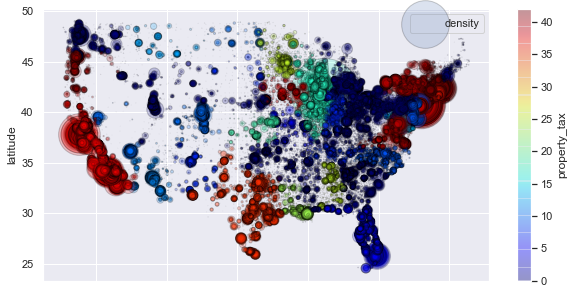

In [48]:
df_sol_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,
                edgecolor = 'black',s=df_sol_copy['population_density']/100, label="density",
                c = 'property_tax',cmap=plt.get_cmap("jet"),
    colorbar=True, figsize=(10,5),
)
plt.legend()
plt.show()
plt.show()

In [49]:
df_ny = df_sol_copy[df_sol_copy['state']=='ny']

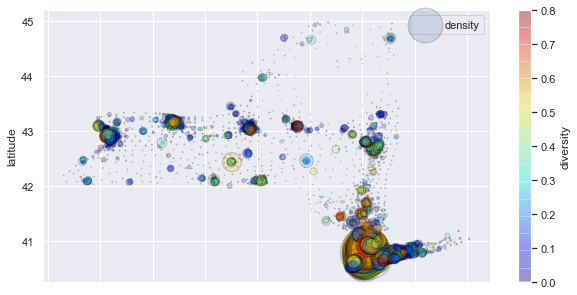

In [50]:
df_ny.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,edgecolor = 'black',
                s=df_ny['population_density']/100, label="density",
                c = 'diversity',cmap=plt.get_cmap("jet"),
    colorbar=True, figsize=(10,5),
)
plt.legend()
plt.show()
plt.show()

### Filter out all the states but those in the s_list for solar DF and lisitngs DF

In [52]:
s_list = ['NY','MA','CO','IL','DC']

## df_solar

In [53]:
df_solar = df_sol_copy[df_sol_copy['state'].isin([x.lower() for x in s_list])]
print('size of old solar DF',df_sol_copy.shape)                 
print('size of new solar DF',df_solar.shape)                                                

size of old solar DF (66735, 53)
size of new solar DF (10652, 53)


In [47]:
## check
set(df_solar.state.tolist())

{'co', 'dc', 'il', 'ma', 'ny'}

In [55]:
df_listings = df_lis[df_lis['state'].isin(s_list)]
print('size of old listings  DF',df_lis.shape)                 
print('size of new listings DF',df_listings.shape)   

size of old listings  DF (59824, 28)
size of new listings DF (59790, 28)


In [97]:
set(df_listings.state.tolist())

{'CO', 'DC', 'IL', 'MA', 'NY'}

### We can do merge on DF that has average solar features per each "metropolitan" area

### Plot overlay of df_solar (for states that are present in df_lis DF) and sf_lis

https://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

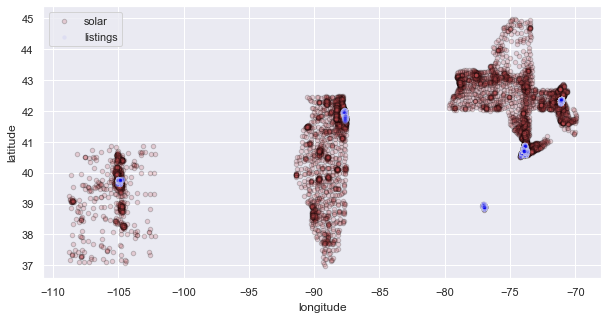

In [60]:
ax = df_solar.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,
                edgecolor = 'black',figsize=(10,5), color = 'r',legend=True, label = 'solar'
)
df_lis.plot(kind="scatter", x="longitude", y="latitude",color ='blue', alpha=0.05,
                edgecolor = 'white',figsize=(10,5), ax=ax, label = 'listings'
)

plt.legend()
plt.show()


#### IT looks like DC metropolitan area doesn't have solar data, but in fact, it does

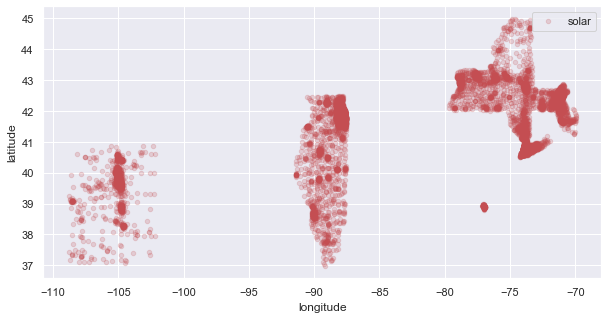

In [61]:
df_solar.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,
                figsize=(10,5), color = 'r',legend=True, label = 'solar')
plt.show()

#### densty of listings points are much higher that density of solar points in DC metropolitan area.
- print coordinates of one oint from DC area (solar DF)

In [62]:

print('point longitude from solar:',df_solar[df_solar['state']=='dc'].longitude[:1].values,
      '\n','point latitude from solar:',df_solar[df_solar['state']=='dc'].latitude[:1].values)
      

point longitude from solar: [-77.053] 
 point latitude from solar: [38.915]


### cities and counties in solar database:
- New York - New York County
- Denver - Denver County
- Chicago - Cook County
- Boston - Suffolk County
- Washington DC - District of Columbia


In [63]:
## states 
s_list

['NY', 'MA', 'CO', 'IL', 'DC']

In [64]:
## ... and corresponding counties
counties = ['New York County','Suffolk County','Denver County','Cook County' ]

In [65]:
##There is Suffolk County in NY! So we need to filter by county and state
set(df_solar[df_solar['county']=='Suffolk County'].state.tolist())



{'ma', 'ny'}

#### points in solar DF where 'Suffolk Count';  is in  'NY'

In [66]:
df_solar[(df_solar['county']=='Suffolk County') & (df_solar['state']=='ny')].shape[0]

323

#### points in solar DF where 'Suffolk Count';  is in  'MA'

In [67]:
df_solar[(df_solar['county']=='Suffolk County') & (df_solar['state']=='ma')].shape[0]



150

### find out how many rows of solar DF are in each metropolitan area in listing DF 

In [68]:
for s,c in zip([x.lower() for x in s_list],counties):
    
    print(s.upper(),':',c,df_solar[(df_solar['state']==s) & (df_solar['county']==c)].shape[0],'rows')
for s in [x.lower() for x in s_list]:
    if s == 'dc':
        print(s.upper(),':',df_solar[df_solar['state']==s].shape[0],'rows')

print('NY',':','Suffolk County',df_solar[(df_solar['state']=='ny') & (df_solar['county']=='Suffolk County')].shape[0],'rows')
    

NY : New York County 288 rows
MA : Suffolk County 150 rows
CO : Denver County 144 rows
IL : Cook County 1318 rows
DC : 158 rows
NY : Suffolk County 323 rows


### concatenate DataFrames 

In [69]:
df_solar_w = pd.concat([df_solar[df_solar['state']=='dc'],df_solar[(df_solar['state'].isin([x.lower() for x in s_list])) & (df_solar['county'].isin(counties))]])



In [70]:
df_solar_w.shape

(2381, 53)

In [71]:
## sanity check
df_solar_w[(df_solar_w['state']=='ny') & (df_solar_w['county']=='Suffolk County')].shape
           

(323, 53)

#### list of metropolitan areas

In [73]:
metro_list = list(pd.unique(df_lis.metropolitan))
metro_list[:-1]

['NYC', 'denver', 'chicago', 'boston']

In [74]:
metro_list

['NYC', 'denver', 'chicago', 'boston', 'dc']

In [413]:
288+323

611

### Assign 'metropolitan' area to each row of df_solar_w database

In [75]:
### create metro list
metro = []
for s,c in zip(df_solar_w.state.tolist(),df_solar_w.county.tolist()):
    if s == 'ny' and (c == 'New York County' or c=='Suffolk County'):
        metro.append('NYC')
    elif s == 'ma' and c == 'Suffolk County':
        metro.append('boston')
    elif s == 'co' and c == 'Denver County':
        metro.append('denver')
    elif s == 'il' and c == 'Cook County':
        metro.append('chicago')
    else:
        metro.append('dc')
        
        
        

In [76]:
## Check num of rowa
ny_i = 0
for i in metro:
    if i=='NYC':
        ny_i += 1
print('total number of rows for NYC metro area:',ny_i)
print('length of the metro list', len(metro))

total number of rows for NYC metro area: 611
length of the metro list 2381


In [77]:
### add metro list to DF as column 
df_solar_w['metropolitan']=metro

In [71]:
'metropolitan' in df_solar_w.columns.tolist()

True

In [78]:
df_solar_w[df_solar_w['metropolitan']=='NYC'].shape[0]

611

In [79]:
df_solar_w.shape

(2381, 54)

In [80]:
df_listings.shape

(59790, 28)

### create database that shows solar DF averge per metropolitan area values
- ave values are based on sample size = 2381

In [93]:

df_ave_metro = df_solar_w.groupby(['metropolitan']).mean().reset_index()
df_ave_metro

,metropolitan,solar_system_count,fips,average_household_income,gini_index,land_area,per_capita_income,population_density,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_other_rate,employ_rate,poverty_family_below_poverty_level_rate,median_household_income,electricity_price_residential,average_household_size,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,latitude,longitude,elevation,frost_days,air_temperature,relative_humidity,daily_solar_radiation,age_18_24_rate,age_25_34_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,household_type_family_rate,occupation_information_rate,occupancy_vacant_rate,occupancy_owner_rate,transportation_public_rate,health_insurance_public_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,diversity,property_tax
0,NYC,40.707038,3.608329e+10,123107.121367,0.456462,1.530082,53267.883914,43232.419869,0.110687,0.214640,0.207699,0.248794,0.146879,0.046743,0.024558,0.705810,0.112064,0.071701,0.928480,0.085225,89282.933222,18.54,2.596910,2036.445172,619931.789474,1667.806563,40.800822,-73.513782,63.450082,61.042553,12.192962,0.658401,3.989902,0.094487,0.164562,0.138395,0.146322,0.082336,0.124430,0.051383,0.600171,0.041940,0.118039,0.475078,0.318608,0.283024,39.762189,31.111481,0.644856,0.324427,0.355624,40.0
1,boston,11.226667,2.502514e+10,79496.360209,0.473597,0.289267,35915.493151,24491.441940,0.151012,0.225567,0.192909,0.237649,0.120754,0.040574,0.031535,0.552541,0.235363,0.078413,0.910292,0.156856,57743.584507,19.83,2.400694,1446.786667,409433.333333,1320.711268,42.333107,-71.078713,132.053333,119.920000,9.510667,0.646387,3.707467,0.150646,0.228711,0.126905,0.116294,0.066081,0.095632,0.041398,0.497131,0.020998,0.080431,0.320713,0.327859,0.386115,33.839041,30.195804,0.794723,0.164874,0.445939,42.0
2,chicago,1.949924,1.703157e+10,75779.028975,0.443056,0.717243,30399.145247,13866.423747,0.158299,0.244823,0.256141,0.203525,0.096310,0.026953,0.013948,0.532563,0.291662,0.089685,0.874075,0.156765,57277.405632,12.50,2.743567,1474.172231,241876.457055,1064.705701,41.861513,-87.737203,211.220789,103.160850,10.055918,0.689275,3.782178,0.098910,0.166498,0.135564,0.130393,0.068757,0.115115,0.062209,0.623928,0.021664,0.115557,0.493497,0.210341,0.338991,36.526312,33.149163,0.743758,0.214193,0.350921,17.0
3,dc,13.930380,1.100101e+10,101323.351404,0.465965,0.344261,45770.867089,16783.276563,0.114589,0.208102,0.184543,0.213795,0.169800,0.074951,0.034221,0.362121,0.537825,0.036930,0.880860,0.143547,75159.576923,12.99,2.323567,1539.829114,486466.666667,1367.397436,38.906778,-77.007418,107.556962,71.455696,13.721519,0.627329,3.984430,0.118266,0.219748,0.137977,0.121524,0.065020,0.110299,0.039144,0.468801,0.038034,0.101935,0.391230,0.381829,0.373188,35.264557,30.757962,0.928466,0.041221,0.349276,5.0
4,denver,34.583333,8.031018e+09,78372.568650,0.444367,1.062501,36196.440559,7619.991374,0.143656,0.177938,0.237135,0.269306,0.117138,0.036533,0.018293,0.770701,0.091704,0.056690,0.933321,0.131139,58507.258741,12.12,2.393217,1915.243056,294808.450704,1054.830986,39.721375,-104.958979,2036.284722,153.486111,7.416667,0.530632,4.566944,0.094739,0.221086,0.150899,0.115682,0.062359,0.108277,0.048233,0.511498,0.034246,0.060753,0.481603,0.072459,0.306446,34.910490,24.748252,0.751691,0.187855,0.358796,10.0


- we need  to eliminate the following variables from df_ave_metro:

 - 'longitude' and 'latitude'
 
- because we will merge it with database df_listings which already has  'longitudes' and 'latitudes'

- 'state' is another variable in df_solar, but we do not have it in df_ave_metro because it is categorcal (eliminated when we groupby df_solar_w

In [94]:
df_ave_metro.drop(['longitude','latitude'], axis = 1, inplace = True)

'longitude' in df_ave_metro.columns

False

In [96]:
df_ave_metro.shape

(5, 50)

In [127]:
df_listings.shape

(59790, 28)

#### Merge df_listings(59790, 28) and df_ave_metro(5, 50)

In [100]:
df_lis_sol_merged = pd.merge(df_listings,df_ave_metro)
## by default the merge is inner and it is on = 'metropolitan', see below why:

In [145]:
ave_list = df_ave_metro.columns.tolist()
df_lis_list = df_listings.columns.tolist()
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
intersection(ave_list, df_lis_list)

['metropolitan']

##### 'metropolitan' is the only common variable present in both DFs

In [128]:
df_lis_sol_merged.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,solar_system_count,fips,average_household_income,gini_index,land_area,per_capita_income,population_density,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_other_rate,employ_rate,poverty_family_below_poverty_level_rate,median_household_income,electricity_price_residential,average_household_size,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,elevation,frost_days,air_temperature,relative_humidity,daily_solar_radiation,age_18_24_rate,age_25_34_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,household_type_family_rate,occupation_information_rate,occupancy_vacant_rate,occupancy_owner_rate,transportation_public_rate,health_insurance_public_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,diversity,property_tax
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,119445,7949480,0,40.852054,-73.788680,NYC,City Island Sanctuary relaxing BR & Bath w Par...,99.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464.0,40.707038,3.608329e+10,123107.121367,0.456462,1.530082,53267.883914,43232.419869,0.110687,0.21464,0.207699,0.248794,0.146879,0.046743,0.024558,0.70581,0.112064,0.071701,0.92848,0.085225,89282.933222,18.54,2.59691,2036.445172,619931.789474,1667.806563,63.450082,61.042553,12.192962,0.658401,3.989902,0.094487,0.164562,0.138395,0.146322,0.082336,0.12443,0.051383,0.600171,0.04194,0.118039,0.475078,0.318608,0.283024,39.762189,31.111481,0.644856,0.324427,0.355624,40.0
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,9117975,16042478,1,40.853491,-73.788607,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464.0,40.707038,3.608329e+10,123107.121367,0.456462,1.530082,53267.883914,43232.419869,0.110687,0.21464,0.207699,0.248794,0.146879,0.046743,0.024558,0.70581,0.112064,0.071701,0.92848,0.085225,89282.933222,18.54,2.59691,2036.445172,619931.789474,1667.806563,63.450082,61.042553,12.192962,0.658401,3.989902,0.094487,0.164562,0.138395,0.146322,0.082336,0.12443,0.051383,0.600171,0.04194,0.118039,0.475078,0.318608,0.283024,39.762189,31.111481,0.644856,0.324427,0.355624,40.0
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,9815788,1886820,0,40.841144,-73.783052,NYC,Quaint City Island Community.,300.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464.0,40.707038,3.608329e+10,123107.121367,0.456462,1.530082,53267.883914,43232.419869,0.110687,0.21464,0.207699,0.248794,0.146879,0.046743,0.024558,0.70581,0.112064,0.071701,0.92848,0.085225,89282.933222,18.54,2.59691,2036.445172,619931.789474,1667.806563,63.450082,61.042553,12.192962,0.658401,3.989902,0.094487,0.164562,0.138395,0.146322,0.082336,0.12443,0.051383,0.600171,0.04194,0.118039,0.475078,0.318608,0.283024,39.762189,31.111481,0.644856,0.324427,0.355624,40.0
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,13886510,6627449,0,40.849775,-73.786609,NYC,Large 1 BDRM in Great location,125.0,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464.0,40.707038,3.608329e+10,123107.121367,0.456462,1.530082,53267.883914,43232.419869,0.110687,0.21464,0.207699,0.248794,0.146879,0.046743,0.024558,0.70581,0.112064,0.071701,0.92848,0.085225,89

### ave prices per city in metro areas

In [105]:
df_lis_sol_merged.groupby(['city','metropolitan'])['price'].mean().sort_values()


city                 metropolitan
capitol heights      dc               27.750000
evergreen park       chicago          30.000000
bedstuy              NYC              32.000000
longislandcity       NYC              34.000000
calumet park         chicago          35.000000
aurora               denver           40.000000
lawrence             NYC              40.000000
hollis               NYC              44.000000
englewood            denver           47.500000
elmhurst             NYC              47.500000
laurelton            NYC              47.500000
elmwood park         chicago          48.000000
milton               boston           50.000000
oak park             chicago          50.000000
hell's kitchen       NYC              51.000000
richmond hill        NYC              51.000000
oakland gardens      NYC              51.666667
springfield gardens  NYC              52.000000
littleton            denver           52.500000
corona               NYC              58.045455
watert

#### conclusion:  the prices within the same  petropolitan area  differs quite a bit. 

### ave  prices per state

In [106]:

df_lis_sol_merged.groupby(['state'])['price'].mean().sort_values()


state
CO    133.850699
IL    136.210486
NY    145.297265
MA    173.925802
DC    247.407608
Name: price, dtype: float64

#### conclusion: if we are to link price to state demographic data  trying to see how it varies with state, the variation  will not be representative of price variatin with metropolitan areas/cities

## Save merged solar and listings DF as .csv file

In [ ]:
## uncomment if you would like to save it
#df_lis_sol_merged.to_csv(r'lis_sol_merged.csv', index = False, header=True)


https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/#differentnames

### How do the average prices for cities in Metro areas change if we take a small sample of df_listings and df_solar_w ?

In [118]:
df_listings_s = df_listings.sample(n=3000,random_state=47)

df_solar_w_s = df_solar_w.sample(n=100,random_state=47)

In [119]:
df_listings_s.shape

(3000, 28)

In [120]:
df_solar_w_s.shape

(100, 54)

In [121]:
'state' in df_listings_s.columns

True

### create database that shows solar DF averge per metropolitan area values, N=100

In [122]:
### average values are based on sample size N=100
df_ave_metro_s = df_solar_w_s.groupby(['metropolitan']).mean().reset_index()
df_ave_metro_s

,metropolitan,solar_system_count,fips,average_household_income,gini_index,land_area,per_capita_income,population_density,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_other_rate,employ_rate,poverty_family_below_poverty_level_rate,median_household_income,electricity_price_residential,average_household_size,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,latitude,longitude,elevation,frost_days,air_temperature,relative_humidity,daily_solar_radiation,age_18_24_rate,age_25_34_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,household_type_family_rate,occupation_information_rate,occupancy_vacant_rate,occupancy_owner_rate,transportation_public_rate,health_insurance_public_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,diversity,property_tax
0,NYC,59.875000,3.608910e+10,137117.058234,0.439604,1.419126,57036.434783,28475.246233,0.096207,0.220779,0.226009,0.240073,0.147171,0.046708,0.023054,0.784448,0.058927,0.075580,0.934534,0.054289,102509.000000,18.54,2.744348,1681.291667,638360.956522,1685.090909,40.813958,-73.434792,62.583333,59.833333,12.212500,0.659042,3.987500,0.078242,0.135169,0.137064,0.151466,0.095253,0.123045,0.061247,0.670860,0.036198,0.096073,0.600491,0.235181,0.284260,41.317391,30.652174,0.585635,0.383113,0.315346,40.0
1,boston,9.800000,2.502510e+10,63134.918883,0.457300,0.286973,25195.200000,17840.014400,0.296730,0.310583,0.196676,0.114938,0.065061,0.010186,0.005827,0.495893,0.242058,0.093240,0.895425,0.170921,48166.800000,19.83,2.660000,1447.400000,297820.000000,1117.800000,42.347800,-71.059600,136.000000,122.000000,9.500000,0.645000,3.700000,0.085909,0.200167,0.149042,0.152722,0.053348,0.079014,0.055776,0.620494,0.015499,0.062268,0.266612,0.370805,0.487152,33.920000,31.800000,0.794723,0.164874,0.543764,42.0
2,chicago,4.200000,1.703159e+10,74094.119533,0.461911,0.610437,29653.254545,13598.823836,0.165165,0.246124,0.251486,0.193144,0.097290,0.031822,0.014969,0.476862,0.350369,0.081170,0.856795,0.183509,53888.527273,12.50,2.702182,1307.163636,247583.333333,1047.272727,41.846182,-87.719400,210.890909,102.527273,10.127273,0.688309,3.778182,0.112425,0.175730,0.138614,0.124735,0.066492,0.104811,0.061166,0.600545,0.018058,0.130170,0.438073,0.230878,0.350454,35.210909,32.963636,0.743758,0.214193,0.321173,17.0
3,dc,11.727273,1.100101e+10,106538.037207,0.476673,0.387228,45003.090909,13476.595182,0.136186,0.232015,0.198834,0.176226,0.153057,0.071315,0.032367,0.295603,0.632191,0.017858,0.866355,0.178330,74209.363636,12.99,2.444545,1344.363636,546700.000000,1148.636364,38.904364,-76.997091,84.818182,69.181818,13.863636,0.628182,3.987273,0.093752,0.200429,0.129999,0.129639,0.060933,0.117592,0.055399,0.540827,0.049791,0.082352,0.389686,0.374651,0.466045,35.681818,32.363636,0.928466,0.041221,0.334689,5.0
4,denver,26.800000,8.031002e+09,72773.428276,0.455580,0.666486,29931.000000,5431.289800,0.121184,0.172512,0.228822,0.306610,0.127291,0.030747,0.012834,0.809013,0.049884,0.028542,0.943095,0.127566,53752.400000,12.12,2.082000,1614.800000,306780.000000,893.400000,39.724600,-104.993800,2156.400000,160.600000,6.760000,0.532000,4.556000,0.223359,0.198792,0.145021,0.095543,0.042296,0.092058,0.030681,0.422025,0.033799,0.080598,0.376432,0.128622,0.278448,31.680000,23.600000,0.751691,0.187855,0.326958,10.0


In [135]:
df_ave_metro_s.shape

(5, 52)

In [136]:
merged1 = pd.merge(df_listings_s,df_ave_metro_s, on = 'metropolitan')

In [137]:
merged1.shape

(3000, 79)

In [138]:
merged1.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,host_id,id,instant_bookable,latitude_x,longitude_x,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,solar_system_count,fips,average_household_income,gini_index,land_area,per_capita_income,population_density,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_other_rate,employ_rate,poverty_family_below_poverty_level_rate,median_household_income,electricity_price_residential,average_household_size,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,latitude_y,longitude_y,elevation,frost_days,air_temperature,relative_humidity,daily_solar_radiation,age_18_24_rate,age_25_34_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,household_type_family_rate,occupation_information_rate,occupancy_vacant_rate,occupancy_owner_rate,transportation_public_rate,health_insurance_public_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,diversity,property_tax
0,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",0,1.0,Real Bed,1.0,1.0,flexible,brighton,35975768,6865619,0,42.338298,-71.154123,boston,fully-furnished 1 bed and 1 bath,108.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,MA,500.0,2135.0,9.8,2.502510e+10,63134.918883,0.4573,0.286973,25195.2,17840.0144,0.29673,0.310583,0.196676,0.114938,0.065061,0.010186,0.005827,0.495893,0.242058,0.09324,0.895425,0.170921,48166.8,19.83,2.66,1447.4,297820.0,1117.8,42.3478,-71.0596,136.0,122.0,9.5,0.645,3.7,0.085909,0.200167,0.149042,0.152722,0.053348,0.079014,0.055776,0.620494,0.015499,0.062268,0.266612,0.370805,0.487152,33.92,31.8,0.794723,0.164874,0.543764,42.0
1,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",14,1.0,Real Bed,1.0,1.0,strict,boston,20684898,9237653,0,42.332484,-71.049417,boston,Minutes to Downtown. Morden Room W/ Private Bath!,110.0,Condominium,10.0,10.0,10.0,10.0,96.0,10.0,Private room,MA,NaN,2127.0,9.8,2.502510e+10,63134.918883,0.4573,0.286973,25195.2,17840.0144,0.29673,0.310583,0.196676,0.114938,0.065061,0.010186,0.005827,0.495893,0.242058,0.09324,0.895425,0.170921,48166.8,19.83,2.66,1447.4,297820.0,1117.8,42.3478,-71.0596,136.0,122.0,9.5,0.645,3.7,0.085909,0.200167,0.149042,0.152722,0.053348,0.079014,0.055776,0.620494,0.015499,0.062268,0.266612,0.370805,0.487152,33.92,31.8,0.794723,0.164874,0.543764,42.0
2,6.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",23,2.0,Real Bed,3.0,4.0,moderate,boston,9419684,11563716,0,42.351717,-71.047257,boston,Lux 3BR in Seaport Square w/wifi,389.0,Apartment,10.0,10.0,10.0,10.0,95.0,9.0,Entire home/apt,MA,NaN,2210.0,9.8,2.502510e+10,63134.918883,0.4573,0.286973,25195.2,17840.0144,0.29673,0.310583,0.196676,0.114938,0.065061,0.010186,0.005827,0.495893,0.242058,0.09324,0.895425,0.170921,48166.8,19.83,2.66,1447.4,297820.0,1117.8,42.3478,-71.0596,136.0,122.0,9.5,0.645,3.7,0.085909,0.200167,0.149042,0.152722,0.053348,0.079014,0.055776,0.620494,0.015499,0.062268,0.266612,0.370805,0.487152,33.92,31.8,0.794723,0.164874,0.543764,42.0
3,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",25,1.0,Real Bed,1.0,1.0,strict,boston,52601623,12904318,0,42.283584,-71.066951,boston,Lovely cozy room close to Subway,55.0,Apartment,10.0,8.0,10.0,10.0,80.0,8.0,Private room,MA,NaN,2124.0,9.8,2.502510e+10,63134.918883,0.4573,0.286973,25195.2,17840.0144,0.29673,0.310583,0.196676,0.114938,0.065061,0.010186,0.005827,0.495893,0.242058,0.09324,0.895425,0.170921,48166.8,19.83,2.66,1447.4,297820.0,1117.8,42.3478,-71.0596,136.0,122.0,9.5,0.645,3.7,0.085909,0.200167,0.149042,0.152722,0.053348,0.079014

In [139]:
merged1.groupby(['city','metropolitan'])['price'].mean().sort_values()

city              metropolitan
forest hills      NYC              35.000000
nyc               NYC              38.000000
corona            NYC              40.000000
oakland gardens   NYC              45.000000
flushing          NYC              45.000000
woodside          NYC              52.333333
ridgewood         NYC              52.500000
manhattan         NYC              54.000000
jackson heights   NYC              55.000000
st albans         NYC              65.000000
saint albans      NYC              65.000000
east boston       boston           65.000000
lic               NYC              70.000000
jamaica           NYC              75.000000
roxbury crossing  boston           83.333333
whitestone        NYC              85.000000
staten island     NYC              86.900000
allston           boston           87.500000
astoria           NYC              91.333333
queens            NYC              96.460317
riverdale         NYC              99.000000
sunnysidebronx    NYC   

### for merged big DF (df_lis_sol_merged) the highest price was 
- chelsea (NYC)  $800

### end SAMPLE